# Symetric neuron - Phase diagram and bistability analysis
Here, we built a symmetric neuron wrt the positive and negative pathways.

![schéma du neurone symétrique.png](<attachment:schéma du neurone symétrique.png>)
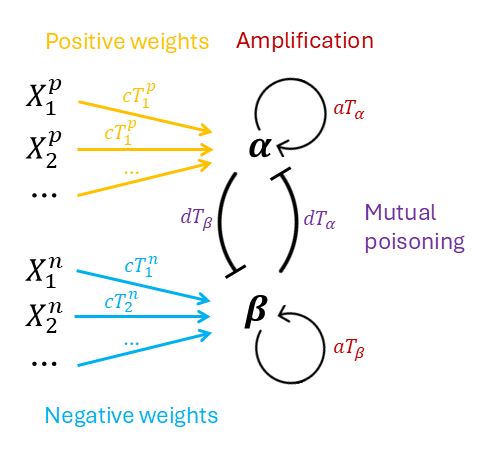

## 1. Dynamics


We are analyzing a system of two coupled ordinary differential equations describing the evolution of a ($\alpha$) and b ($\beta$):

$$
\frac{da}{dt} = P + \frac{\lambda_a \cdot a}{1 + k_a \cdot a} - \eta_a \cdot a - \mu_a \cdot a b
$$
$$
\frac{db}{dt} = N + \frac{\lambda_b \cdot b}{1 + k_b \cdot b} - \eta_b \cdot b - \mu_b \cdot a b
$$

Where:
- $a, b$: dynamic variables (e.g., population levels, concentrations)
- $P, N$: external input/production rates
- $\lambda_a, \lambda_b$: growth rate constants
- $k_a, k_b$: saturation constants (Hill-type terms)
- $\eta_a, \eta_b$: decay or dilution rates
- $\mu_a, \mu_b$: interaction strengths between $a$ and $b$


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve, root
from scipy.linalg import eigvals
from ipywidgets import interact, FloatSlider, interactive_output, HBox
from IPython.display import display, clear_output
from matplotlib.lines import Line2D
from tqdm import tqdm
from itertools import product
from ipywidgets import widgets


In [2]:
# Paramètres fixes
eta = 0.1
mu = 0.2
ka = 0.7
kb = 0.7
lambda_a = 1.0
lambda_b = 1.0

# Entrées définies manuellement
P = 0.4  # <-- Change cette valeur si besoin
N = 0.8 # <-- Change cette valeur si besoin
a0 = 0.0 
b0 = 0.0


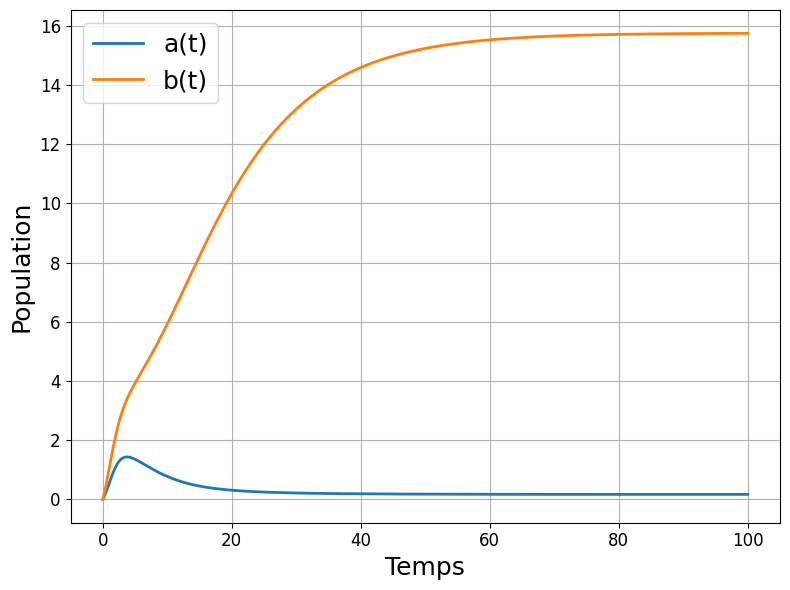

In [ ]:
#raw version of the dynamics of a and b where the parameters are fixed and the inputs are defined manually
# Système d'EDO
def dydt(t, y):
    a, b = y
    da_dt = P + (lambda_a * a) / (1 + ka * a) - eta * a - mu * a * b
    db_dt = N + (lambda_b * b) / (1 + kb * b) - eta * b - mu * a * b
    return [da_dt, db_dt]

# Conditions initiales et temps
y0 = [0.0,0.0]
t_span = [0, 100]
t_eval = np.linspace(0, 100, 1000)

# Résolution
sol = solve_ivp(dydt, t_span, y0, t_eval=t_eval)


# Tracé
plt.figure(figsize=(8, 6))
plt.plot(sol.t, sol.y[0], label='a(t)',linewidth=2)
plt.plot(sol.t, sol.y[1], label='b(t)',linewidth=2)

plt.xlabel('Temps', fontsize=18)  # Taille plus grande pour l'axe X
plt.ylabel('Population', fontsize=18)  # Taille plus grande pour l'axe Y

plt.grid(True)

plt.legend(fontsize=18)  # Légende plus grande

plt.tick_params(axis='both', which='major', labelsize=12)  # Taille des ticks

plt.tight_layout()
plt.show()



In [ ]:
# Fixed constants
eta = 0.1
mu = 0.2
ka = 0.7
kb = 0.7
lambda_a = 1.0
lambda_b = 1.0

# Widgets
P_slider = widgets.FloatSlider(value=0.5, min=0.0, max=2.0, step=0.05, description='P:')
N_slider = widgets.FloatSlider(value=0.4, min=0.0, max=2.0, step=0.05, description='N:')
output = widgets.Output()


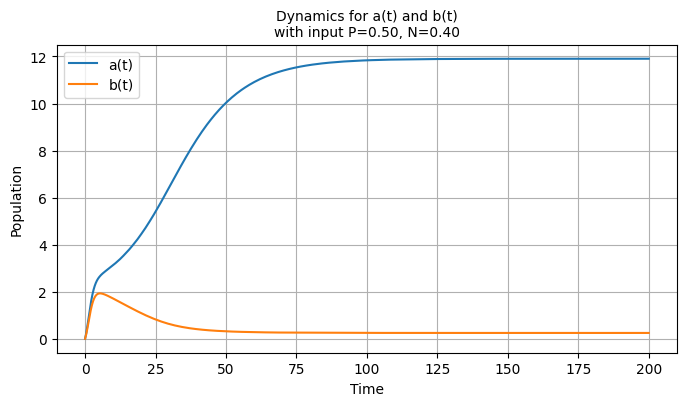

Output()

In [ ]:
#Slider version of the dynamics of a and b where the parameters are fixed and the inputs are defined manually

def dydt(t, y, P, N):
    a, b = y
    da_dt = P + (lambda_a * a) / (1 + ka * a) - eta * a - mu * a * b
    db_dt = N + (lambda_b * b) / (1 + kb * b) - eta * b - mu * a * b
    return [da_dt, db_dt]

# Set up figure
fig, ax = plt.subplots(figsize=(8, 4))

# Function to update plot
def update(P, N):
    ax.clear()

    # Initial conditions and time span
    y0 = [0.0,0.0]
    t_span = [0, 200]
    t = np.linspace(0, 200, 1000)

    # Solve ODE
    sol = solve_ivp(lambda t, y: dydt(t, y, P, N), t_span, y0, t_eval=t)

    # Plot results
    ax.plot(sol.t, sol.y[0], label='a(t)')
    ax.plot(sol.t, sol.y[1], label='b(t)')
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    
    # Build title with all fixed parameters
    title_text = (
        f"Dynamics for a(t) and b(t)\n"
        f"with input P={P:.2f}, N={N:.2f}"
    )
    ax.set_title(title_text, fontsize=10)
    ax.legend()
    ax.grid(True)

    # Refresh output
    with output:
        clear_output(wait=True)
        display(fig)

# Initial plot
update(P_slider.value, N_slider.value)

# Link widgets
interactive_plot = interactive_output(update, {'P': P_slider, 'N': N_slider})
controls = widgets.HBox([P_slider, N_slider])

display(controls, output)

There is always a WTA, even for close initial P and N values, yet the more P and N are initially close, the more it takes time to reach the 0-100 final concentration.
For P=N, this amount ouf time is infinite and both species end up at the same concetration 50/50.

It seems to be a pure WTA dynamics. Indeed, if we introduce such a mutual symetric predation, then, both a and b are penalized the same way, and the only things that makes one of the 2 species to dominate is that the more there is a or b, the more the autocatalysis acts. If all a and b constant are equal, then the winning substance only depends on initial concentrations of N and P. 

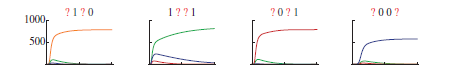
This is exactly like in the Rondelez 2013 article, with winner takes all (WTA).

### 2: Existence of a bistability 

Bistability means that the system can switch between two distincts stable outcome, and once the latter is reached, the system resits change (like a biological toggle switch).

- 1 stable fixed point : monostable, the system always go to the same state, whose eq value can move from a to b depending on N and P 

- 2 stables  fixed points and 1 unstable : bistable, the system can end up in either states

- no stable fixed point : no steady state.

For now, it seems we have a monostable WTA system. Depending on the N and P values, we end up on the same fixed point, whose value can be either a or b. 



We are analyzing a system of two coupled ordinary differential equations:

$$
\frac{da}{dt} = P + \frac{\lambda_a \cdot a}{1 + k_a \cdot a} - \eta_a \cdot a - \mu_a \cdot a b
$$
$$
\frac{db}{dt} = N + \frac{\lambda_b \cdot b}{1 + k_b \cdot b} - \eta_b \cdot b - \mu_b \cdot a b
$$

Where:
- $a, b$: dynamic variables (e.g., population levels, concentrations)
- $P, N$: external input/production rates
- $\lambda_a, \lambda_b$: growth rate constants
- $k_a, k_b$: saturation constants (Hill-type terms)
- $\eta_a, \eta_b$: decay or dilution rates
- $\mu_a, \mu_b$: interaction strengths between $a$ and $b$

The Jacobian matrix $ J(a,b) $ is computed by taking partial derivatives of the right-hand sides with respect to $a$ and $b$.

Let:
- $ f(a,b) = \frac{da}{dt} $
- $ g(a,b) = \frac{db}{dt} $

Then the Jacobian is:

$$
J(a, b) =
\begin{bmatrix}
\frac{\partial f}{\partial a} & \frac{\partial f}{\partial b} \\
\frac{\partial g}{\partial a} & \frac{\partial g}{\partial b}
\end{bmatrix}
=
\begin{bmatrix}
\frac{\lambda_a}{(1 + k_a a)^2} - \eta_a - \mu_a b & -\mu_a a \\
-\mu_b b & \frac{\lambda_b}{(1 + k_b b)^2} - \eta_b - \mu_b a
\end{bmatrix}
$$



- If all eigenvalues have negative real parts : **stable**
- If any eigenvalue has a positive real part : **unstable**

This helps identify whether the system is **monostable** (one stable fixed point) or **bistable** (two stable fixed points)



From our approximations, we can set that $\mu_a=\mu_b$ (symmetric predation) and $\eta_a=\eta_b$ (same degradation rate)

The a-nullcline and b-nullcline are drawn in red and blue and corresponds respectively to da/dt=0 and db/dt=0. Above the curve (da/dt>0), a is increasing, below, as is decreasing. A crossing between the 2 yields a fixed point.
There is indeed a bistability switch : the 2 stable fp are either a-dominance or b-dominance.

In [ ]:
# Parameters
eta = 0.1
mu = 0.2
ka = 0.7
kb = 0.7
lambda_a = 1.0
lambda_b = 1.0

In [ ]:
# System of ODEs
def derivatives(a, b, P, N):
    da_dt = P + (lambda_a * a) / (1 + ka * a) - eta * a - mu * a * b
    db_dt = N + (lambda_b * b) / (1 + kb * b) - eta * b - mu * a * b
    return da_dt, db_dt

# Jacobian matrix
def jacobian(a, b):
    dFda = lambda_a / (1 + ka * a)**2 - eta - mu * b
    dFdb = -mu * a
    dGda = -mu * b
    dGdb = lambda_b / (1 + kb * b)**2 - eta - mu * a
    return np.array([[dFda, dFdb], [dGda, dGdb]])

# Fixed point finder with stability
def find_all_fixed_points(P, N, amax, bmax, grid_res=20, tol=1e-4):
    a_vals = np.linspace(0, amax, grid_res)
    b_vals = np.linspace(0, bmax, grid_res)
    fixed_points = []

    def system(vars):
        a, b = vars
        return derivatives(a, b, P, N)

    for a0 in a_vals:
        for b0 in b_vals:
            sol, info, ier, _ = fsolve(system, (a0, b0), full_output=True)
            if ier == 1 and np.all(np.isreal(sol)):
                sol = np.real(sol)
                if not any(np.linalg.norm(sol - fp[0]) < tol for fp in fixed_points):
                    a_fp, b_fp = sol
                    if 0 <= a_fp <= amax and 0 <= b_fp <= bmax:
                        J = jacobian(a_fp, b_fp)
                        eigvals = np.linalg.eigvals(J)
                        stable = np.all(np.real(eigvals) < 0)
                        fixed_points.append((sol, stable))
    return fixed_points

# Nullcline functions
def a_nullcline(a, P):
    """da/dt = 0: solve for b in terms of a"""
    # P + (lambda_a * a) / (1 + ka * a) - eta * a - mu * a * b = 0
    # Solve for b: b = (P + (lambda_a * a) / (1 + ka * a) - eta * a) / (mu * a)
    numerator = P + (lambda_a * a) / (1 + ka * a) - eta * a
    # Avoid division by zero
    return np.where(a > 1e-10, numerator / (mu * a), np.nan)

def b_nullcline(b, N):
    """db/dt = 0: solve for a in terms of b"""
    # N + (lambda_b * b) / (1 + kb * b) - eta * b - mu * a * b = 0
    # Solve for a: a = (N + (lambda_b * b) / (1 + kb * b) - eta * b) / (mu * b)
    numerator = N + (lambda_b * b) / (1 + kb * b) - eta * b
    # Avoid division by zero
    return np.where(b > 1e-10, numerator / (mu * b), np.nan)

# Plotting
def plot_phase_portrait(P=1.0, N=1.0, amax=20, bmax=20):
    a_vals = np.linspace(0, amax, 25)
    b_vals = np.linspace(0, bmax, 25)
    A, B = np.meshgrid(a_vals, b_vals)
    dA, dB = derivatives(A, B, P, N)
    norm = np.sqrt(dA**2 + dB**2)

    plt.figure(figsize=(8, 7))
    plt.quiver(A, B, dA / norm, dB / norm, norm, cmap='plasma', alpha=0.7)
    
    # Plot nullclines
    a_null_vals = np.linspace(0.01, amax, 500)  # Start from small positive value
    b_null_vals = np.linspace(0.01, bmax, 500)
    
    # a-nullcline (da/dt = 0)
    b_from_a = a_nullcline(a_null_vals, P)
    valid_a = (b_from_a >= 0) & (b_from_a <= bmax) & ~np.isnan(b_from_a)
    plt.plot(a_null_vals[valid_a], b_from_a[valid_a], 'r-', linewidth=2.5, 
             label='a-nullcline (da/dt = 0)', alpha=0.8)
    
    # b-nullcline (db/dt = 0)
    a_from_b = b_nullcline(b_null_vals, N)
    valid_b = (a_from_b >= 0) & (a_from_b <= amax) & ~np.isnan(a_from_b)
    plt.plot(a_from_b[valid_b], b_null_vals[valid_b], 'b-', linewidth=2.5, 
             label='b-nullcline (db/dt = 0)', alpha=0.8)
    
    plt.xlabel("a", fontsize=20)
    plt.ylabel("b", fontsize=20)
    #plt.title(f"Phase Portrait with Nullclines\nP = {P:.2f}, N = {N:.2f}", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xlim(0, amax)
    plt.ylim(0, bmax)
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label('Flow magnitude', fontsize=18)

    # Fixed points
    fps = find_all_fixed_points(P, N, amax, bmax, grid_res=20)
    
    # Track which types of fixed points we have for legend
    has_stable = False
    has_unstable = False
    
    for (a_fp, b_fp), stable in fps:
        if stable and not has_stable:
            plt.plot(a_fp, b_fp, 'o', color='darkgreen', 
                    markersize=10, markeredgecolor='black', markeredgewidth=1.5,
                    label='Stable fixed point')
            has_stable = True
        elif not stable and not has_unstable:
            plt.plot(a_fp, b_fp, 'o', color='darkred', 
                    markersize=10, markeredgecolor='black', markeredgewidth=1.5,
                    label='Unstable fixed point')
            has_unstable = True
        else:
            # Plot without label for additional points of same type
            plt.plot(a_fp, b_fp, 'o', color='darkgreen' if stable else 'darkred', 
                    markersize=10, markeredgecolor='black', markeredgewidth=1.5)

    if not fps:
        plt.text(0.5, bmax - 0.5, 'No fixed points found', color='red', fontsize=16)

    plt.legend(loc='upper right', fontsize=16)
    
    # Increase tick label sizes
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.savefig("phase_portrait.png", dpi=300)
    plt.show()

# Sliders
interact(plot_phase_portrait,
         P=FloatSlider(min=0.0, max=5.0, step=0.1, value=0.5),
         N=FloatSlider(min=0.0, max=5.0, step=0.1, value=0.4),
         amax=FloatSlider(min=1.0, max=30.0, step=0.5, value=13.0),
         bmax=FloatSlider(min=1.0, max=30.0, step=0.5, value=13.0));

interactive(children=(FloatSlider(value=0.5, description='P', max=5.0), FloatSlider(value=0.4, description='N'…

The system is either bistable (on, off are stable, undecided is unstable) or monostable (on, off or undecided is stable). For P=N we start exactly at a0=b0=0, the flow converges toward the red FP (unstable).
Sarting with a little bias in a or b $\neq 0$ leads the system to end up on the green stable FP (either on of off.) 

### 3. Phase diagram

All properties obtained (s.t. the functionning range) are implicit functions of the dynamical parameters.

In [15]:
# === Paramètres ===
eta_a, eta_b = 0.1, 0.1
mu_a, mu_b = 0.2, 0.2
k_a, k_b = 0.7, 0.7
lambda_a, lambda_b = 1.0, 1.0
nb_points = 500  # Nombre de points dans la grille
# === Espace de paramètres P et N ===
P_vals = np.linspace(0, 2, nb_points)
N_vals = np.linspace(0, 2, nb_points)

In [16]:
from scipy.optimize import root
from scipy.integrate import solve_ivp
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# === Système d'équations ===
def da_dt(a, b, P):
    return P + (lambda_a * a) / (1 + k_a * a) - eta_a * a - mu_a * a * b

def db_dt(a, b, N):
    return N + (lambda_b * b) / (1 + k_b * b) - eta_b * b - mu_b * a * b

def system(y, P, N):
    a, b = y
    return [da_dt(a, b, P), db_dt(a, b, N)]



# === Valeurs d'initialisation pour la recherche de points fixes ===
a_guesses = [0.1, 1, 5, 10]
b_guesses = [0.1, 1, 5, 10]

# === Stockage des résultats ===
bifurcation_data = []

# === Boucle principale avec barre de progression ===
print("Calcul du nombre de points fixes pour chaque (P, N)...")
for P, N in tqdm(product(P_vals, N_vals), total=len(P_vals)*len(N_vals), desc="Grille P vs N"):
    fixed_points = []
    seen = []

    # Recherche par solveur 'root'
    for a0 in a_guesses:
        for b0 in b_guesses:
            try:
                sol = root(lambda y: system(y, P, N), [a0, b0], method='hybr')
                if sol.success:
                    a_sol, b_sol = sol.x
                    if a_sol >= 0 and b_sol >= 0:  # Pas de seuil arbitraire trop élevé
                        if not any(np.hypot(a_sol - x, b_sol - y) < 0.2 for x, y in seen):
                            fixed_points.append((a_sol, b_sol))
                            seen.append((a_sol, b_sol))
            except:
                continue

    # Si aucun point fixe trouvé, essaie une simulation dynamique
    if len(fixed_points) == 0:
        try:
            sol_ivp = solve_ivp(lambda t, y: system(y, P, N), [0, 200], [1.0, 1.0],
                                method='RK45', atol=1e-8, rtol=1e-6)
            final_a, final_b = sol_ivp.y[0, -1], sol_ivp.y[1, -1]
            res_final = system([final_a, final_b], P, N)
            if all(abs(df) < 1e-3 for df in res_final):
                fixed_points.append((final_a, final_b))
        except:
            pass

    bifurcation_data.append((P, N, len(fixed_points)))

# === Conversion en tableau numpy ===
bifurcation_data = np.array(bifurcation_data)
P_plot = bifurcation_data[:, 0]
N_plot = bifurcation_data[:, 1]
fp_count = bifurcation_data[:, 2]



Calcul du nombre de points fixes pour chaque (P, N)...


Grille P vs N: 100%|██████████| 250000/250000 [07:52<00:00, 529.20it/s]


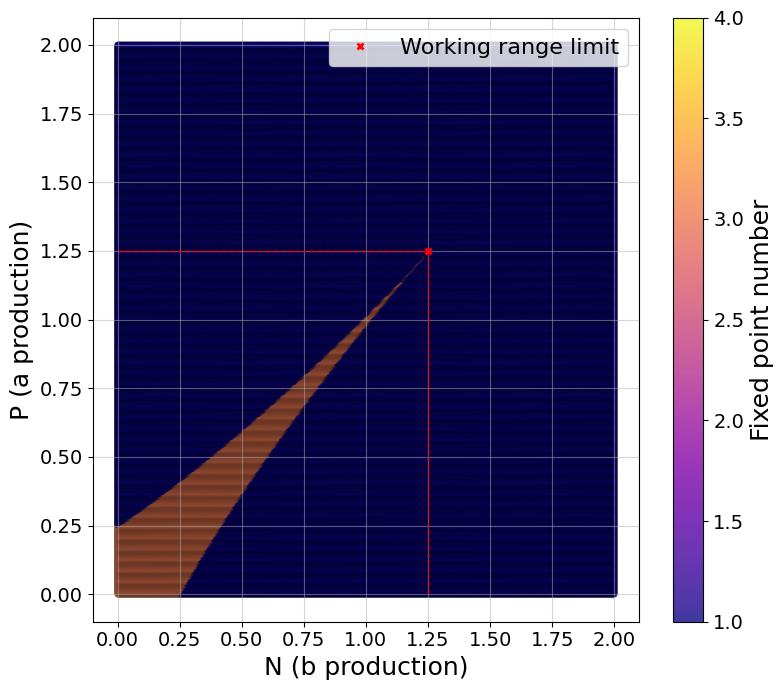

In [17]:
plt.figure(figsize=(8, 7))

scatter = plt.scatter(N_plot, P_plot, c=fp_count, cmap='plasma', s=20, alpha=0.8,
                      edgecolors='k', linewidth=0.2)

# Colorbar avec taille du texte augmentée
cbar = plt.colorbar(scatter)
cbar.set_label("Fixed point number", fontsize=18)
cbar.ax.tick_params(labelsize=14)

# Labels des axes
plt.xlabel("N (b production)", fontsize=18)
plt.ylabel("P (a production)", fontsize=18)

# Taille des ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Ajout de la croix et des pointillés limités
x_cross, y_cross = 1.25, 1.25
plt.plot([x_cross, x_cross], [0, y_cross], color='red', linestyle='--', linewidth=1)
plt.plot([0, x_cross], [y_cross, y_cross], color='red', linestyle='--', linewidth=1)
cross_marker, = plt.plot(x_cross, y_cross, marker='x', color='red', markersize=5, mew=2, linestyle='None')

# Ajout de la légende
plt.legend([cross_marker], ["Working range limit"], fontsize=16, loc='upper right')

plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()



The bistable region is shown in orange, while the monostable region is in dark blue. There is a pathological zone within the monostable region, located at the apex of the bistable region along the $P = N$ diagonal. This zone is pathological because the only stable fixed point is the undecided state, causing many neurons to end up in this state.

Therefore, the $P = N$ diagonal in the monostable region must be excluded, which defines the working range limit plotted in red.


Nevertheless, by the principle of a bistable switch, the bistable region can be extended toward higher values of $P$ and $N$ by increasing $\mu_a$ and $\mu_b$ to 0.8.


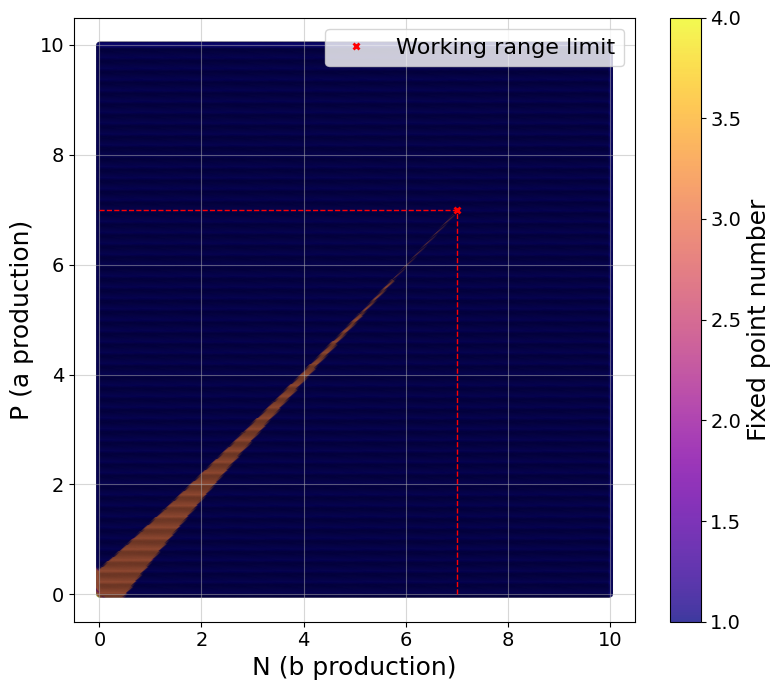